In [44]:
# library
import numpy as np
import gff2coverage
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
path_gff = 'data/results/all.gff'
path_genome = 'data/Stuberosum_genome.gff3'
te_types = ['MITE', 'TRIM', 'LARD', 'TIR','helitron','LTR','SINE', 'LINE']
te_class = {}
te_class[1] = ['TRIM', 'LARD','LTR','SINE', 'LINE']
te_class[2] = ['MITE', 'TIR','helitron']
unit_value = 1000000

In [49]:
#load chromosomal srtucture
df_genome = pd.read_csv(path_genome, sep='\t', header=None)
df_genome.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
df_genome

,seqname,source,feature,start,end,score,strand,frame,attribute
0,chr01,.,chromosome,0,88663952,.,0,.,.
1,chr02,.,chromosome,0,48614681,.,0,.,.
2,chr03,.,chromosome,0,62290286,.,0,.,.
3,chr04,.,chromosome,0,72208621,.,0,.,.
4,chr05,.,chromosome,0,52070158,.,0,.,.
5,chr06,.,chromosome,0,59532096,.,0,.,.
6,chr07,.,chromosome,0,56760843,.,0,.,.
7,chr08,.,chromosome,0,56938457,.,0,.,.
8,chr09,.,chromosome,0,61540751,.,0,.,.
9,chr10,.,chromosome,0,59756223,.,0,.,.


In [72]:
centromers = {}
centromers[1] = 21#(25.9 / 68.2) * df_genome[df_genome.seqname == 'chr01'].iloc[0]['end'] / unit_value
centromers[2] = 4#(4.3 / 48.0) * df_genome[df_genome.seqname == 'chr02'].iloc[0]['end'] / unit_value
centromers[3] = (16.8 / 56.7) * df_genome[df_genome.seqname == 'chr03'].iloc[0]['end'] / unit_value
centromers[4] = (35.7 / 55.1) * df_genome[df_genome.seqname == 'chr04'].iloc[0]['end'] / unit_value
centromers[5] = (44.5 / 37.4) * df_genome[df_genome.seqname == 'chr05'].iloc[0]['end'] / unit_value
centromers[6] = (19.8 / 53.3) * df_genome[df_genome.seqname == 'chr06'].iloc[0]['end'] / unit_value
centromers[7] = (30.5 / 34.3) * df_genome[df_genome.seqname == 'chr07'].iloc[0]['end'] / unit_value
centromers[8] = (27.8 / 43.7) * df_genome[df_genome.seqname == 'chr08'].iloc[0]['end'] / unit_value
centromers[9] = (31.5 / 36.3) * df_genome[df_genome.seqname == 'chr09'].iloc[0]['end'] / unit_value
centromers[10] = (37.3 / 31.6) * df_genome[df_genome.seqname == 'chr10'].iloc[0]['end'] / unit_value
centromers[11] = (47.8 / 40.6) * df_genome[df_genome.seqname == 'chr11'].iloc[0]['end'] / unit_value
centromers[12] = (40.4 / 42.3) * df_genome[df_genome.seqname == 'chr12'].iloc[0]['end'] / unit_value

In [73]:
centromers

{1: 33.67150083284457,
 2: 4.3550651729166665,
 3: 18.456381037037037,
 4: 46.784896001814886,
 5: 61.955134518716584,
 6: 22.115112585365853,
 7: 50.47246972303207,
 8: 36.22171864073226,
 9: 53.40313103305786,
 10: 70.53503537658227,
 11: 53.54031730541871,
 12: 58.418255782505916}

In [74]:
#load data
df = pd.read_csv(path_gff, sep='\t')
df.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']

In [75]:
# sep by chr
dfs = {}
for seq in df.seqname.unique():
    dfs[seq] = df[df.seqname == seq]

In [28]:
ys = {}
xs = {}
max_chrs = {}
for chr_num in range(1, 13):
    chr_name = 'chr' + str(chr_num).zfill(2)
    df_genome_chr = df_genome[df_genome.seqname == chr_name]
    max_chr = df_genome_chr.iloc[0].end
    max_chrs[chr_num] = max_chr
    df_chr = dfs[chr_name]
    print('%s: elements count: %i max: %i' % (chr_name, len(df_chr.index), max_chr) )
    #separate by step and calculate coverage
    step = 1 # in mb
    bins = (max_chr / unit_value) + 1
    x = np.arange(0, bins + step, step)
    y = []
#    for te in te_types:
    for te_class_n in [2, 1]:
        current = []
        for i in np.arange(0, bins + step, step):
            nt_start = i * unit_value
            nt_end = (i * unit_value) + (unit_value * step) - 1
#            df_res = df_chr[((df_chr.start + df_chr.end) / 2 >= nt_start) & ((df_chr.start + df_chr.end) / 2 <= nt_end) & (df_chr.attribute.str.contains(te))]
            df_res = df_chr[((df_chr.start + df_chr.end) / 2 >= nt_start) & ((df_chr.start + df_chr.end) / 2 <= nt_end) & (df_chr.attribute.str.contains('|'.join(te_class[te_class_n])))]
            coverage = gff2coverage.calc_coverage_part(df_res, unit_value)
            current.append(coverage)
        y.append(current)
    ys[chr_name] = y
    xs[chr_name] = x

chr01: elements count: 39484 max: 88663952
chr02: elements count: 21403 max: 48614681
chr03: elements count: 24983 max: 62290286
chr04: elements count: 26917 max: 72208621
chr05: elements count: 21582 max: 52070158
chr06: elements count: 21919 max: 59532096
chr07: elements count: 30947 max: 56760843
chr08: elements count: 27022 max: 56938457
chr09: elements count: 22723 max: 61540751
chr10: elements count: 27851 max: 59756223
chr11: elements count: 19894 max: 45475667
chr12: elements count: 42289 max: 61165649


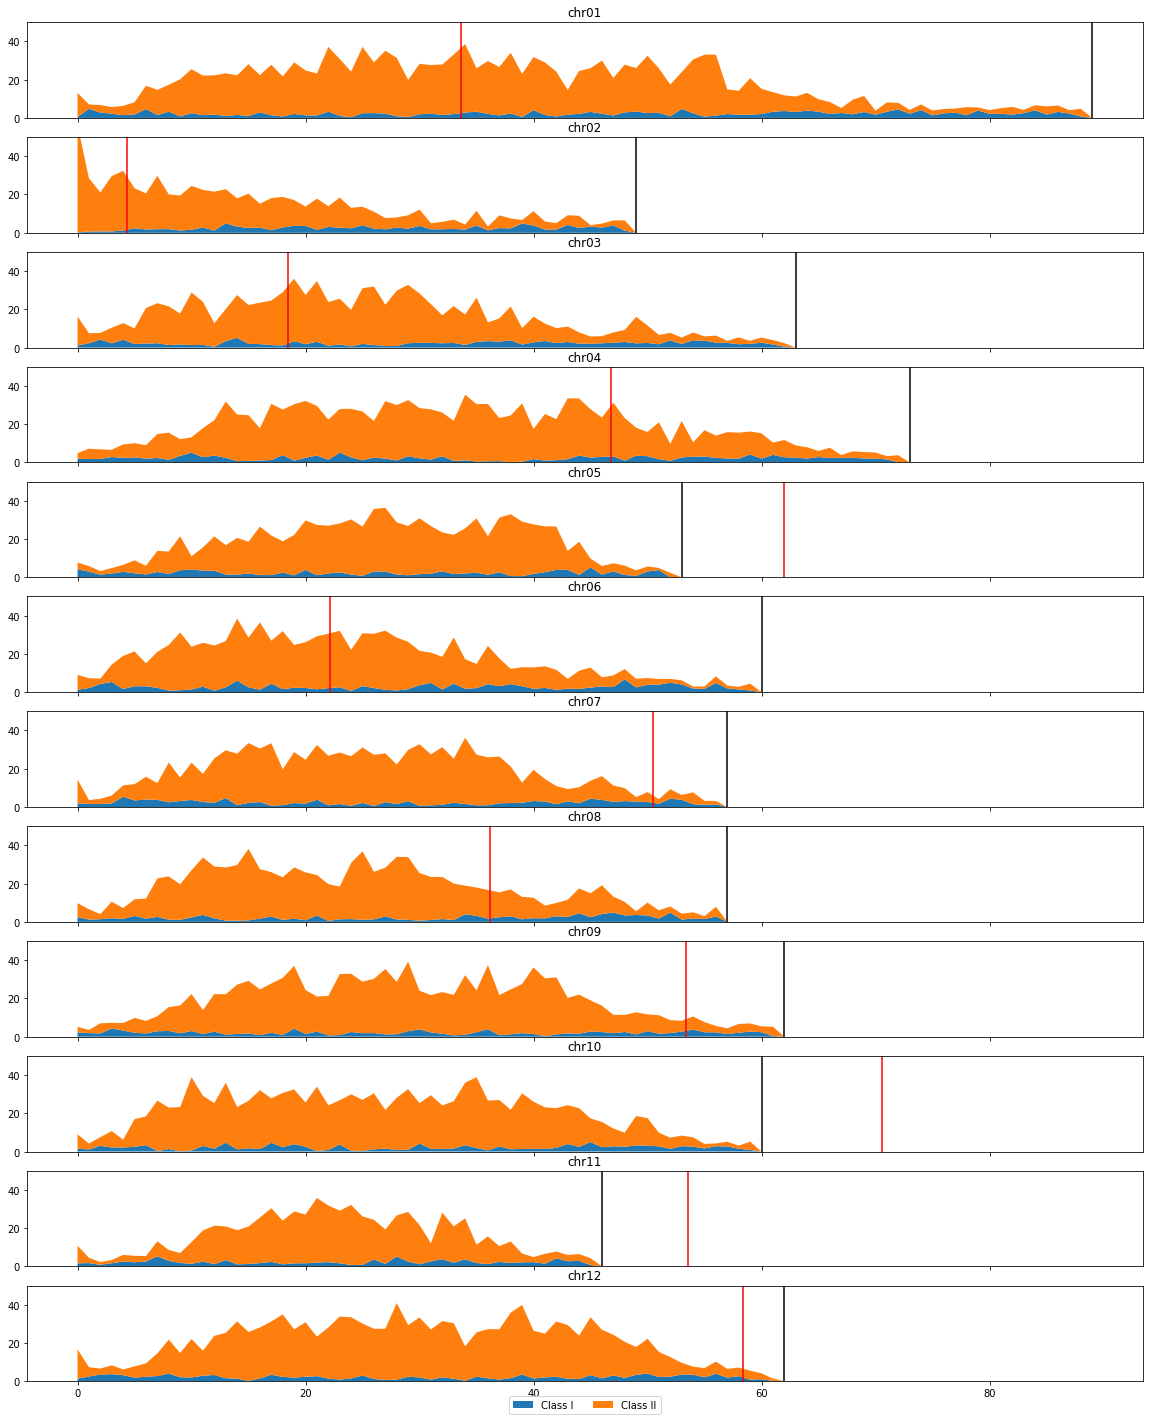

In [76]:
legend = False
fig, axs = plt.subplots(nrows=12, sharex=True)
fig.set_size_inches(20, 25)
for chr_num in range(1, 13):
    chr_name = 'chr' + str(chr_num).zfill(2)
    axs[chr_num - 1].set_ylim([0,50])
#    axs[chr_num - 1].stackplot(xs[chr_name], ys[chr_name], labels=te_types,)    
    axs[chr_num - 1].stackplot(xs[chr_name], ys[chr_name], labels=['Class I','Class II'])    
    axs[chr_num - 1].set_title(chr_name)
    end_point = df_genome[df_genome.seqname == chr_name].iloc[0]['end']
    #chr end
    axs[chr_num - 1].axvline((end_point / unit_value ) + 1, color='black')
    #centromere
    axs[chr_num - 1].axvline(centromers[chr_num], color='red')
#    axs[chr_num - 1].plot([max_chrs[chr_num]], [50], color='r')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig('data/results/foo.png')

In [80]:
x_ = range(0,6)
y_=[ [1,1,4,6,8,10], [1,2,2,7,10,10], [1,2,8,5,10,1] ]